Класифікація датсету

https://archive.ics.uci.edu/ml/datasets/glass+identification

In [660]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import classification_report
from imblearn.over_sampling import RandomOverSampler
from collections import Counter
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import ClusterCentroids, RandomUnderSampler, NearMiss
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTEENN

In [661]:
database = pd.read_csv("glass.data", sep=',', 
    names=['Id number', 'refractive index', 'Sodium', 'Magnesium', 'Aluminum', 'Silicon', 'Potassium', 'Calcium', 'Barium', 'Iron', 'Type of glass'])

7. Attribute Information:

   1. Id number: 1 to 214

   2. RI: refractive index

   3. Na: Sodium (unit measurement: weight percent in corresponding oxide, as are attributes 4-10)

   4. Mg: Magnesium

   5. Al: Aluminum

   6. Si: Silicon

   7. K: Potassium
   
   8. Ca: Calcium

   9. Ba: Barium

  10. Fe: Iron

  11. Type of glass: (class attribute)
  
      -- 1 building_windows_float_processed

      -- 2 building_windows_non_float_processed

      -- 3 vehicle_windows_float_processed

      -- 4 vehicle_windows_non_float_processed (none in this database)

      -- 5 containers

      -- 6 tableware
      
      -- 7 headlamps


In [662]:
database

,Id number,refractive index,Sodium,Magnesium,Aluminum,Silicon,Potassium,Calcium,Barium,Iron,Type of glass
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
209,210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [663]:
database.groupby(['Type of glass']).describe()

Id number                                                  \
                  count   mean        std    min     25%    50%     75%   
Type of glass                                                             
1                  70.0   35.5  20.351085    1.0   18.25   35.5   52.75   
2                  76.0  108.5  22.083176   71.0   89.75  108.5  127.25   
3                  17.0  155.0   5.049752  147.0  151.00  155.0  159.00   
5                  13.0  170.0   3.894440  164.0  167.00  170.0  173.00   
6                   9.0  181.0   2.738613  177.0  179.00  181.0  183.00   
7                  29.0  200.0   8.514693  186.0  193.00  200.0  207.00   

                     refractive index            ... Barium        Iron  \
                 max            count      mean  ...    75%   max count   
Type of glass                                    ...                      
1               70.0             70.0  1.518718  ...   0.00  0.69  70.0   
2              146.0             76.0  1.518619  ...   0.00  3.15  76.0   
3              163.0             17.0  1.517964  ...   0.00  0.15  17.0   
5              176.0             13.0  1.518928  ...   0.00  2.20  13.0   
6              185.0              9.0  1.517456  ...   0.00  0.00   9.0   
7              214.0             29.0  1.517116  ...   1.59  2.88  29.0   

                                                               
                   mean       std  min  25%  50%    75%   max  
Type of glass                                                  
1              0.057000  0.089075  0.0  0.0  0.0  0.110  0.31  
2              0.079737  0.106433  0.0  0.0  0.0  0.155  0.35  
3              0.057059  0.107864  0.0  0.0  0.0  0.090  0.37  
5              0.060769  0.155588  0.0  0.0  0.0  0.000  0.51  
6              0.000000  0.000000  0.0  0.0  0.0  0.000  0.00  
7              0.013448  0.029794  0.0  0.0  0.0  0.000  0.09  

[6 rows x 80 columns]

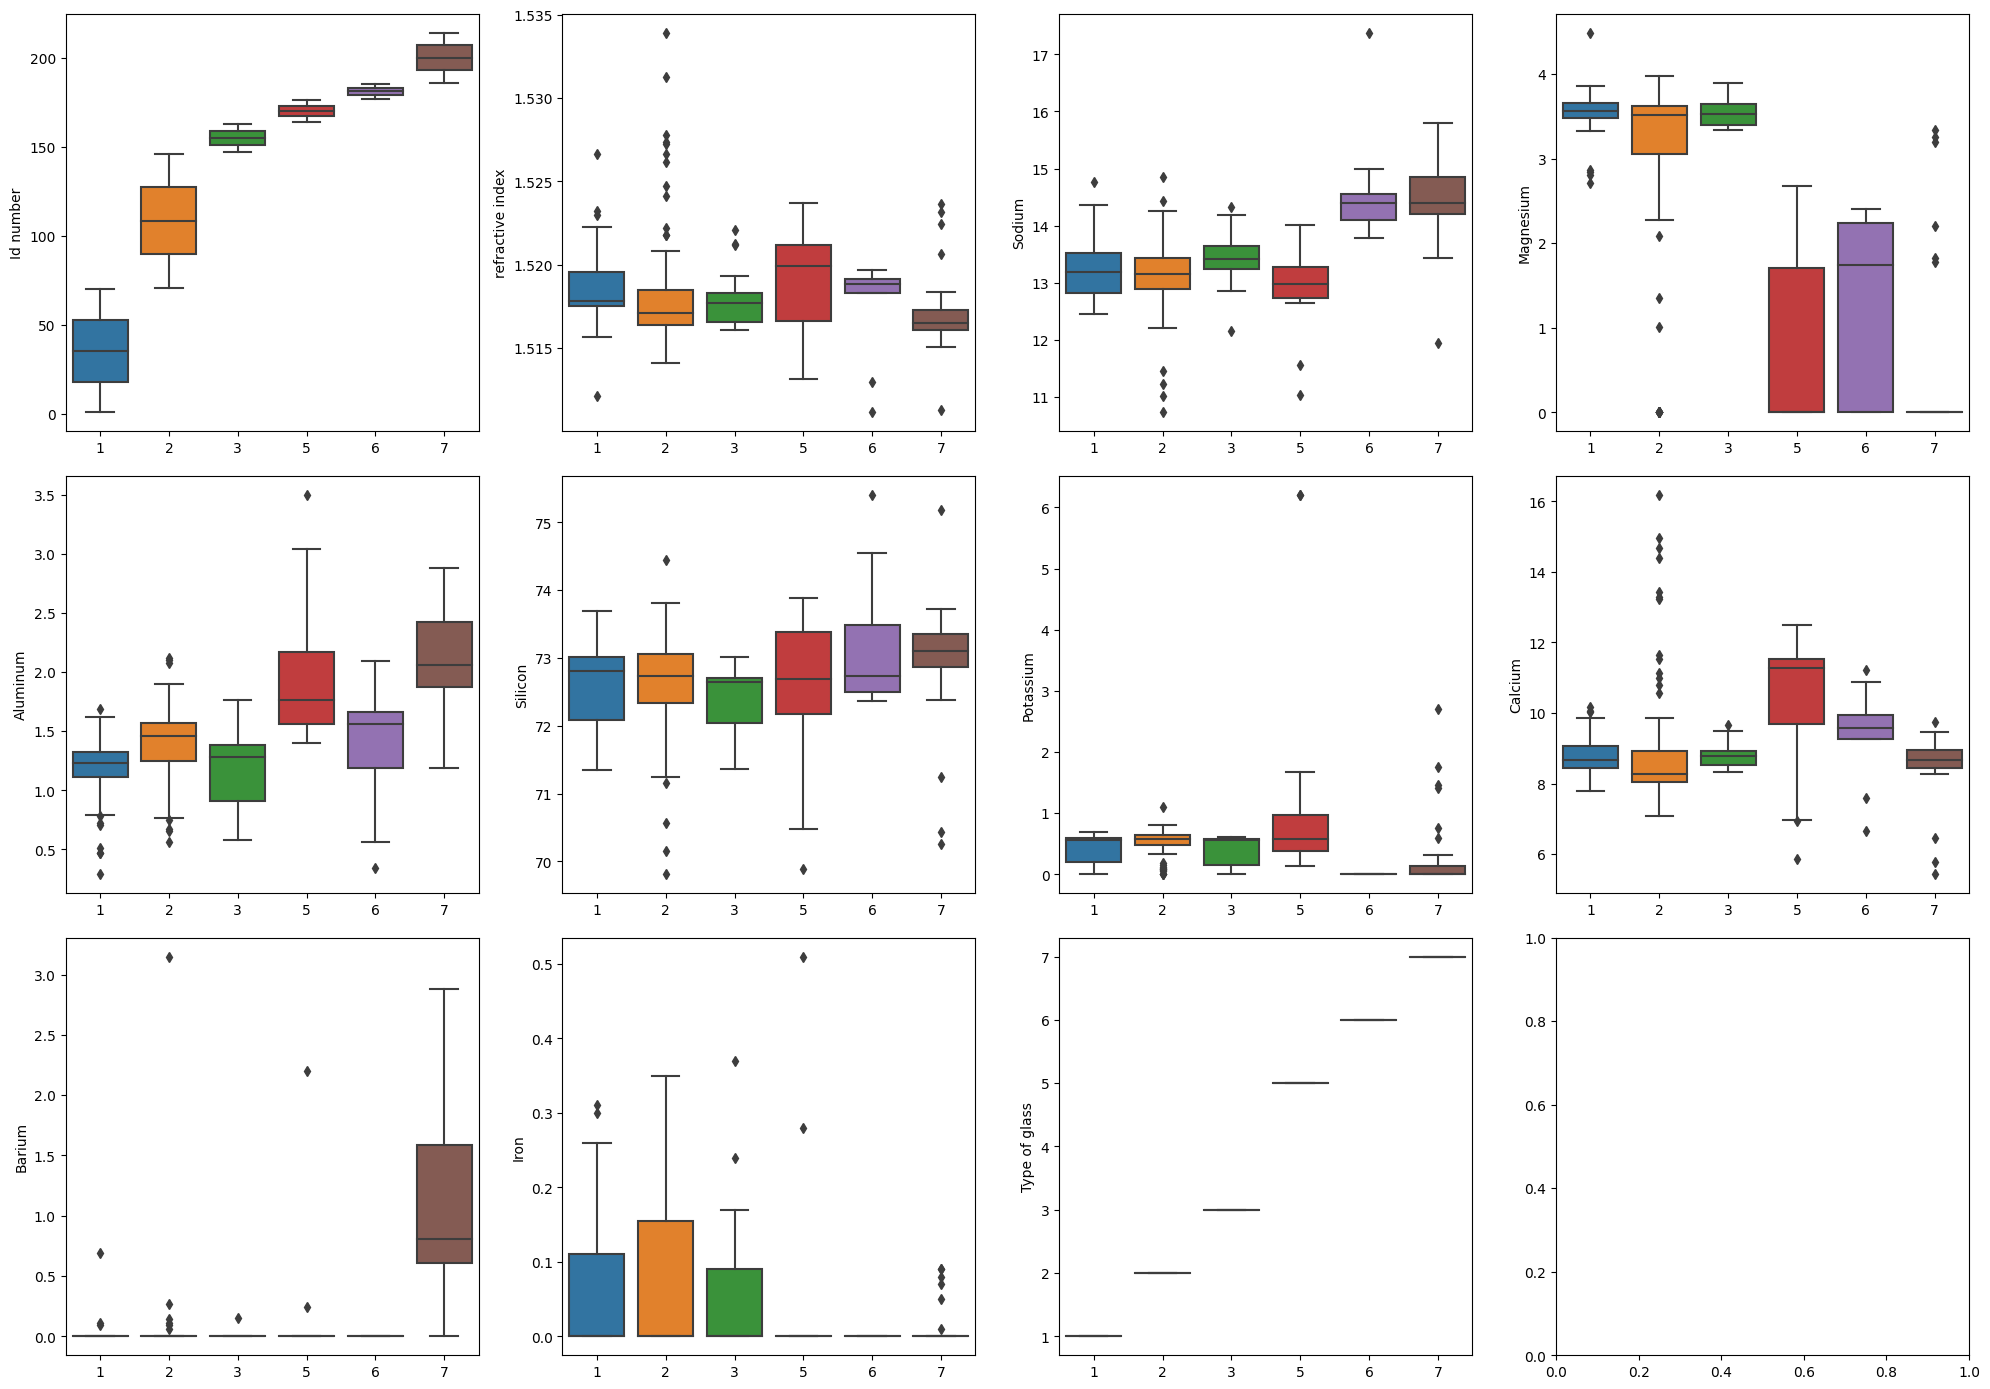

In [664]:
fig, axes = plt.subplots(nrows = 3, ncols = 4, figsize = (20, 14))
for idx, feat in enumerate(database):
    ax = axes[int(idx/4), idx % 4]
    sns.boxplot(database, x="Type of glass", y=feat, ax = ax)
    ax.set_xlabel("")
    ax.set_ylabel(feat)
fig.tight_layout()

удаляем столбик индекса

In [665]:
database = database.drop(columns= ['Id number'])

чтобы сравнить результат работы будем каждый раз использовать один и тот же скалер (StandardScaler) и один и тот же классификатор (KNeighborsClassifier) со стандартыми гиперпараметрами. Для начала оценим результаты не меняя дисбаланс классов

In [666]:
reg = make_pipeline(StandardScaler(),KNeighborsClassifier())

In [667]:
y = np.array(database['Type of glass'])
X = database.drop(columns= ['Type of glass'])

In [668]:
print(sorted(Counter(y).items()))

[(1, 70), (2, 76), (3, 17), (5, 13), (6, 9), (7, 29)]


In [669]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y)

In [670]:
reg.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kneighborsclassifier', KNeighborsClassifier())])

In [671]:
print(classification_report(y_test, reg.predict(X_test)))

              precision    recall  f1-score   support

           1       0.64      0.76      0.70        21
           2       0.70      0.70      0.70        23
           3       0.00      0.00      0.00         5
           5       0.50      0.50      0.50         4
           6       1.00      1.00      1.00         3
           7       0.80      0.89      0.84         9

    accuracy                           0.69        65
   macro avg       0.61      0.64      0.62        65
weighted avg       0.64      0.69      0.66        65



d:\programs\python\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\programs\python\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\programs\python\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


результаты довольно плохие так как таркет с номером 3 вообще не узнается программой, а таргеты под номером 5 и 6 тоже узнаются с большой ошибкой(хотя по графикам видно, что они заметно отличаются)

<center>RandomOverSampler</center>

In [672]:
ros = RandomOverSampler(random_state=0)

In [673]:
X_resampled, y_resampled = ros.fit_resample(X, y)

In [674]:
print(sorted(Counter(y_resampled).items()))

[(1, 76), (2, 76), (3, 76), (5, 76), (6, 76), (7, 76)]


In [675]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, stratify=y_resampled)

In [676]:
reg.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kneighborsclassifier', KNeighborsClassifier())])

In [677]:
print(classification_report(y_test, reg.predict(X_test)))

              precision    recall  f1-score   support

           1       0.88      0.61      0.72        23
           2       0.71      0.68      0.70        22
           3       0.81      0.96      0.88        23
           5       0.92      1.00      0.96        23
           6       0.88      1.00      0.94        23
           7       0.95      0.91      0.93        23

    accuracy                           0.86       137
   macro avg       0.86      0.86      0.85       137
weighted avg       0.86      0.86      0.86       137



видно, что результаты заметно улучшились, попробуем другие способы

<center>SMOTE</center>

In [678]:
X_resampled, y_resampled = SMOTE().fit_resample(X, y)

In [679]:
print(sorted(Counter(y_resampled).items()))

[(1, 76), (2, 76), (3, 76), (5, 76), (6, 76), (7, 76)]


In [680]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, stratify=y_resampled)

In [681]:
reg.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kneighborsclassifier', KNeighborsClassifier())])

In [682]:
print(classification_report(y_test, reg.predict(X_test)))

              precision    recall  f1-score   support

           1       0.63      0.74      0.68        23
           2       0.80      0.52      0.63        23
           3       0.70      0.83      0.76        23
           5       0.88      0.96      0.92        23
           6       0.96      1.00      0.98        22
           7       0.95      0.83      0.88        23

    accuracy                           0.81       137
   macro avg       0.82      0.81      0.81       137
weighted avg       0.82      0.81      0.81       137



SMOTE показал себя еще лучше(хоть и не значительно, но при многократном запуске программы результаты лучше для всех классов). попробуем undersampling, хоть в данном случае это плохо подходит, так как данных миноритарного класса (типа стекла номер 6) всего лишь 9 штук(что очень мало). при большем количестве данных undersampling должен подойти лучше, чтобы не создавать базу данных слишком большую

<center>RandomUnderSampler</center>

In [683]:
X_resampled, y_resampled = RandomUnderSampler().fit_resample(X, y)

In [684]:
print(sorted(Counter(y_resampled).items()))

[(1, 9), (2, 9), (3, 9), (5, 9), (6, 9), (7, 9)]


In [685]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, stratify=y_resampled)

In [686]:
reg.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kneighborsclassifier', KNeighborsClassifier())])

In [687]:
print(classification_report(y_test, reg.predict(X_test)))

              precision    recall  f1-score   support

           1       0.50      0.67      0.57         3
           2       0.20      0.33      0.25         3
           3       0.50      0.67      0.57         3
           5       0.00      0.00      0.00         3
           6       1.00      0.33      0.50         3
           7       0.00      0.00      0.00         2

    accuracy                           0.35        17
   macro avg       0.37      0.33      0.32        17
weighted avg       0.39      0.35      0.33        17



<center>ClusterCentroids</center>

In [688]:
X_resampled, y_resampled = ClusterCentroids().fit_resample(X, y)

d:\programs\python\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
d:\programs\python\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
d:\programs\python\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
d:\programs\python\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
d:\programs\python\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarni

In [689]:
print(sorted(Counter(y_resampled).items()))

[(1, 9), (2, 9), (3, 9), (5, 9), (6, 9), (7, 9)]


In [690]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, stratify=y_resampled)

In [691]:
reg.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kneighborsclassifier', KNeighborsClassifier())])

In [692]:
print(classification_report(y_test, reg.predict(X_test)))

              precision    recall  f1-score   support

           1       0.33      0.67      0.44         3
           2       0.33      0.33      0.33         3
           3       0.50      0.50      0.50         2
           5       1.00      1.00      1.00         3
           6       0.33      0.33      0.33         3
           7       0.00      0.00      0.00         3

    accuracy                           0.47        17
   macro avg       0.42      0.47      0.44        17
weighted avg       0.41      0.47      0.43        17



d:\programs\python\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\programs\python\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\programs\python\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<center>NearMiss</center>

In [693]:
X_resampled, y_resampled = NearMiss().fit_resample(X, y)

In [694]:
print(sorted(Counter(y_resampled).items()))

[(1, 9), (2, 9), (3, 9), (5, 9), (6, 9), (7, 9)]


In [695]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, stratify=y_resampled)

In [696]:
reg.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kneighborsclassifier', KNeighborsClassifier())])

In [697]:
print(classification_report(y_test, reg.predict(X_test)))

              precision    recall  f1-score   support

           1       0.12      0.33      0.18         3
           2       0.00      0.00      0.00         3
           3       0.00      0.00      0.00         3
           5       1.00      0.67      0.80         3
           6       1.00      0.50      0.67         2
           7       1.00      1.00      1.00         3

    accuracy                           0.41        17
   macro avg       0.52      0.42      0.44        17
weighted avg       0.49      0.41      0.43        17



как и ожидалось при таком малом количестве миноритарного класса undersampling дает плохие результаты, более того при многократном запуске программы я заметил, что результаты постоянно разные( что связано опять таки с тем, что для обучения остается всего лишь 6 экземпляров каждого класса и 3 для теста). Попробуем еще комбинированный метод SMOTEENN каждого класса

<center>SMOTEENN</center>

In [698]:
X_resampled, y_resampled = SMOTEENN().fit_resample(X, y)

In [699]:
print(sorted(Counter(y_resampled).items()))

[(1, 33), (2, 40), (3, 58), (5, 74), (6, 75), (7, 66)]


In [700]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, stratify=y_resampled)

In [701]:
reg.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kneighborsclassifier', KNeighborsClassifier())])

In [702]:
print(classification_report(y_test, reg.predict(X_test)))

              precision    recall  f1-score   support

           1       0.82      0.90      0.86        10
           2       0.88      0.58      0.70        12
           3       0.84      0.94      0.89        17
           5       0.96      1.00      0.98        22
           6       1.00      1.00      1.00        23
           7       1.00      1.00      1.00        20

    accuracy                           0.93       104
   macro avg       0.92      0.90      0.90       104
weighted avg       0.93      0.93      0.93       104



комбинированный способ(в частности SMOTEENN) показал себя лучше всего.


 взависимости от датасета и компонентов следует выбирать способ или комбинировать их вручную. следует не забывать что при малом количестве примеров класса результат может довольно сильно отличаться даже при многократном запуске одной и той же программы. Выбор метода или комбинации методов должен зависить от количества данных. Следует избегать утери данных так же как и чрезменого увеличения датасета(в том числе и копирования шумов). В подведении итого по данному датасету, то к нему подошли оба вида oversampler (дали заметное улучшение результатов) и ни один undersampler (ни в каком из трех случаев не было стабильно хорошего результата). Повторюсь это связано с малым количеством данных миноритарного класса. Комбинированный метод SMOTEENN справился лучше всего и дал хорошие результаты по всем классам.